In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# Regression Task: Linear Regression

## Linear Regression with Numpy

### Create Dataset

In [2]:
# create X

act_w = 3 #actual weight or slope
act_c = 2 #actual intercept

#Create X, a number from 1 to 10
X = np.arange(1,11)

#Create y
y = act_w*X+act_c

In [3]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
y

array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32])

### Step of Calculation
steps:
1. define model params
2. create forward, loss, and gradient function
3. calculate forward
4. calculate gradient
5. update weight using gradient descent
6. re do step 3 until get desired results or reach maximum n_iters


### Define forward method and loss function

In [5]:
#define weight and intercept
w, c = 0, 0 

# create forward function
"""
it follow pytorch convention to get more sence about pytorch,
which the convention itself differs from sklearn where it consits
of .fit() and .predict() function
"""
def forward(w, c):
    return w*X + c

# create loss function, which is MSE
def loss(y, y_pred):
    try: 
        loss = (((y-y_pred)**2)/len(y)).sum()
    except TypeError:
        loss = (y-y_pred)**2
    return loss

### Define gradient loss function

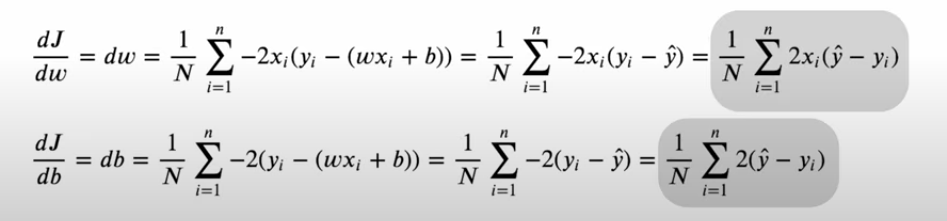

In [6]:
# calculate gradient or first partial derivatives
def gradient(w,y,y_pred):
    N = len(X)
    s = y_pred-y
    dw = (1/N)*np.dot(2*X, s)
    dc = (1/N)*np.sum(2*s)
    return dw, dc

In [7]:
# looping
n_iters = 400
lr = 0.01
learning_losses = list()
tol = 1e-3

#start from weight and intercept equals to 0
w, c = 1, 2
X_test = X[0]

#print inital guess
print(f"before training: y = {y[0]}, y_pred = {w*X_test}, loss = {loss(y[0], X_test*w+c)}")

#loop
run = True
epoch = 0
while run:
    # calculate forward
    y_pred = forward(w, c)

    # calculate loss
    loss_ = loss(y, y_pred)
    learning_losses.append(loss_)

    # calculate gradients
    dw, dc = gradient(w,y,y_pred)

    # update gradients
    w -= lr*dw
    c -= lr*dc

    if (epoch+1)%(n_iters/10) == 0:
        print(f"epochs {epoch+1}: y = {y[0]}, y_pred = {w*X_test+c}, loss = {loss(y[0], X_test*w+c)}")    

    # epoch number
    epoch += 1

    # stop loop
    if (loss_ <= tol) or (epoch == n_iters):
        run = False

before training: y = 5, y_pred = 1, loss = 4
epochs 40: y = 5, y_pred = 5.203697934392516, loss = 0.04149284847577786
epochs 80: y = 5, y_pred = 5.172139103840738, loss = 0.029631871071092473
epochs 120: y = 5, y_pred = 5.14546966889705, loss = 0.02116142456901737
epochs 160: y = 5, y_pred = 5.122932117670346, loss = 0.015112305554915783
epochs 200: y = 5, y_pred = 5.103886299250538, loss = 0.010792363171972389
epochs 240: y = 5, y_pred = 5.087791241023872, loss = 0.007707302000511612
epochs 280: y = 5, y_pred = 5.074189783023498, loss = 0.005504123905073727
epochs 320: y = 5, y_pred = 5.062695592873293, loss = 0.003930737365733745


In [8]:
print(f"estimated w: {w:.3f}, actual w: {act_w}")
print(f"estimated c: {c:.3f}, actual c: {act_c}")

estimated w: 2.990, actual w: 3
estimated c: 2.068, actual c: 2


## Create Linear Regression Using Matrix for More Complex Calculation

we will introduce a little complexity where we use n numbers of weight which can be arbitrary integer number greater than 1.
first we will only use numpy, and than gradually change it to use pytorch in order to get deeper understanding of low level machine learning alghoritm and what is happening under the hood.

###  Linear Regression with Numpy

In [9]:
# dummy dataset
from sklearn.datasets import make_regression

X_train, y_train = make_regression(n_features=10, 
                                   noise = 0.1,
                                   bias = 10,
                                   random_state=7)

In [10]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (100, 10)
Shape of y_train: (100,)


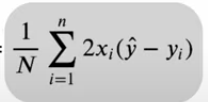

In [11]:
# create forward function
def forward(X, fit_intercept=True):
    """
    Forward calculation.
    
    Assuming X is a matrix with dimension (ns, nf), and params is just a matrix of parameter for linear regression
    with dimension (nf, 1). the params matrix consist of weight from 1 to n, and also the intercept.
    """
    #calculate forward
    ns, nf = X.shape
    if fit_intercept:
        return X @ weights + intercept
    else: return X @ weights

# create gradient function
def gradient(X, 
             fit_intercept = True):
    """
    Calculate gradient of Loss Function. The loss function is in the form of MSE.
    X is in matrix format.
    returned matrix of size (number_of_features, 1).
    
    Term used:
    ns = number of samples
    nf = number of features
    """
    # calculate number of samples within X
    ns, nf = X.shape

    dw = -(2/ns)*(X.T @ (y - forward(X)))
    # compute and return gradient
    if fit_intercept:
        I = np.ones((ns, 1))
        dc = 2*(intercept - (1/ns)*(I.T@(y - X @ weights)))
        return dw, dc
    else: return dw

# function to initalize params
def params_init(X,
                fit_intercept = True,
                use_tensor = False,
                strategy = 'zero'):
    """
    initialize parameters used
    """
    #initialize params
    ns, nf = X.shape
    if fit_intercept:
        #if use numpy
        if use_tensor == False:
            if strategy == 'zero':
                weights = np.zeros((nf, 1))
                intercept = 0

        #if use pytorch
        elif use_tensor:
            if strategy == 'zero':
                weights = torch.zeros((nf, 1), requires_grad = True)
                intercept = torch.tensor(0, dtype=torch.float32, requires_grad = True)          
            
        #return params
        return weights, intercept
        
    else:
        if use_tensor:
            if strategy == 'zero':
                torch.zeros((nf, 1), required_grad = True)
        elif use_tensor==False:
            if strategy == 'zero':
                np.zeros((nf, 1))
        return weights

In [12]:
# add intercept and reshape y
X = X_train
y = y_train.reshape(-1, 1)

# initalize params
weights, intercept = params_init(X)

print(f"Shape of X : {X.shape}")
print(f"Shape of y : {y.shape}")
print(f"Shape of weights : {weights.shape}")
print(f"Value of intercept : {intercept}")

Shape of X : (100, 10)
Shape of y : (100, 1)
Shape of weights : (10, 1)
Value of intercept : 0


In [13]:
max_iters = 1000
lr = 0.01
#record initial Loss
loss_records = []
#printing training results
print_speed = max_iters/10

# run linear regression:
run = True
epoch = 0
while run:
    # Do forward calculation
    y_pred = forward(X)

    # Record Loss and print results
    loss_records.append(loss(y, y_pred))
    if epoch == 0:
        print(f"Before Training. Loss: {loss_records[epoch] :.4f}")
    elif epoch % print_speed == 0:
        print(f"Epoch-{epoch}. Loss: {loss_records[epoch] :.4f}")
    
    # Compute Gradient
    dw, dc = gradient(X)

    # Update params
    weights -= lr*dw
    intercept -= lr*dc

    # update epoch
    epoch += 1

    # Stoping loop
    if epoch > max_iters:
        run = False

print(f"Final Results. Loss: {loss_records[-1] :.4f}")

Before Training. Loss: 26884.1609
Epoch-100. Loss: 995.7969
Epoch-200. Loss: 47.2114
Epoch-300. Loss: 2.8400
Epoch-400. Loss: 0.2146
Epoch-500. Loss: 0.0275
Epoch-600. Loss: 0.0120
Epoch-700. Loss: 0.0105
Epoch-800. Loss: 0.0104
Epoch-900. Loss: 0.0104
Epoch-1000. Loss: 0.0104
Final Results. Loss: 0.0104


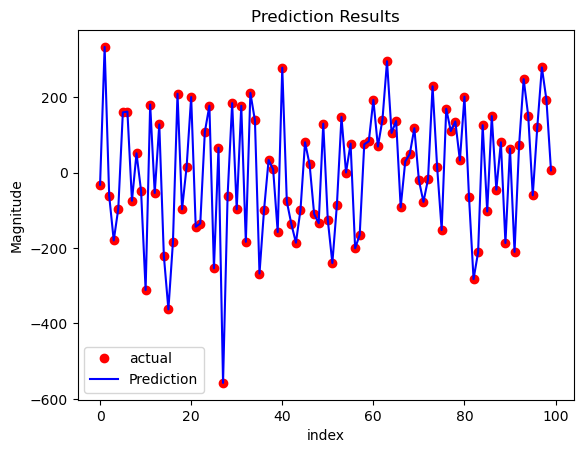

In [14]:
def plot_prediction(y = y, 
                    y_pred = y_pred):
    plt.plot(y, 'ro')
    plt.plot(y_pred, 'b-')
    
    plt.title("Prediction Results")
    plt.legend(['actual', 'Prediction'])
    plt.ylabel("Magnitude")
    plt.xlabel("index")
    plt.show();

plot_prediction()

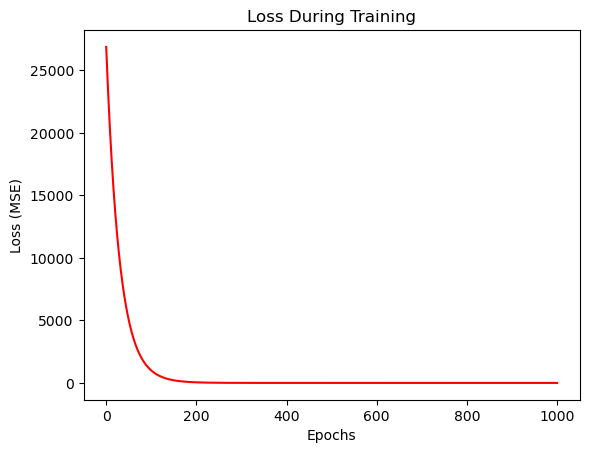

In [15]:
def plot_loss(loss_records = loss_records):
    plt.plot(loss_records, 'r-')
    
    plt.title("Loss During Training")
    plt.ylabel("Loss (MSE)")
    plt.xlabel("Epochs")
    plt.show();

plot_loss()

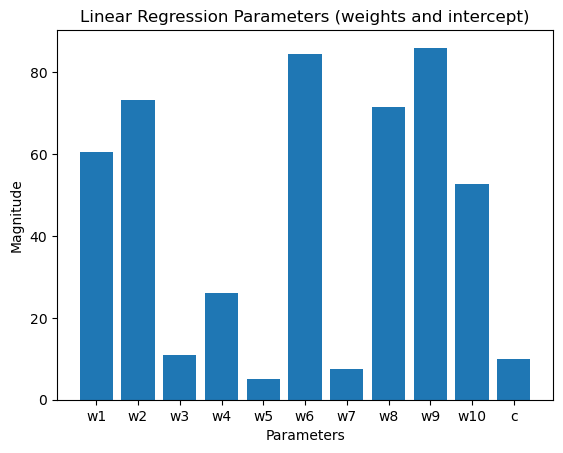

In [16]:
def plot_params(weights = weights, 
                intercept = intercept):
    
    
    x_ax = ['w'+str(i+1) for i in range(len(weights))] + ['c']
    y_ax = np.concatenate([weights.reshape(-1), intercept.reshape(-1)])
    
    plt.bar(x_ax, y_ax)
    plt.title("Linear Regression Parameters (weights and intercept)")
    plt.ylabel("Magnitude")
    plt.xlabel("Parameters")
    plt.show();

plot_params()

In [17]:
weights

array([[60.47015213],
       [73.31491134],
       [10.88185672],
       [26.04666819],
       [ 5.15451043],
       [84.63618843],
       [ 7.62332385],
       [71.48233883],
       [86.05616166],
       [52.76004526]])

In [18]:
intercept

array([[9.98801948]])

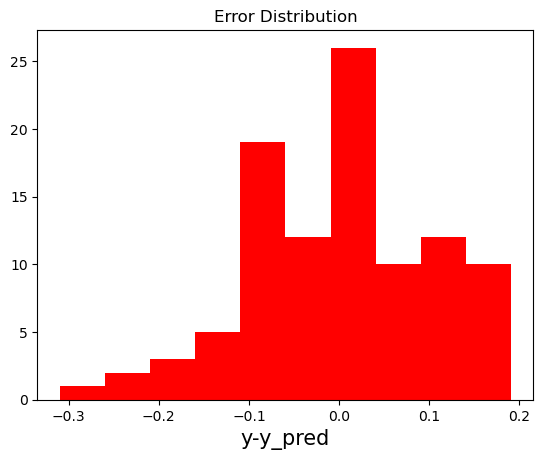

In [19]:
def plot_dist_error(y=y, y_pred=y_pred):
    plt.hist((y-y_pred), color='r')
    plt.title("Error Distribution")
    plt.xlabel("y-y_pred", size=15)
    plt.show();

plot_dist_error()

### Change The Gradient Calculation using Torch

In [20]:
# add intercept and reshape y
X = torch.tensor(X_train, dtype=torch.float32)
y = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

# initalize params
weights, intercept = params_init(X, use_tensor = True)

print(f"Shape of X : {X.shape}")
print(f"Shape of y : {y.shape}")
print(f"Shape of weights : {weights.shape}")
print(f"Value of intercept : {intercept}")

Shape of X : torch.Size([100, 10])
Shape of y : torch.Size([100, 1])
Shape of weights : torch.Size([10, 1])
Value of intercept : 0.0


In [21]:
max_iters = 300
lr = 0.01
#record initial Loss
loss_records = []
#printing training results
print_speed = max_iters/10

# run linear regression:
run = True
epoch = 0
while run:
    # Do forward calculation
    y_pred = forward(X)

    # Record Loss and print results
    loss_ = loss(y, y_pred)
    loss_records.append(loss_)
    if epoch == 0:
        print(f"Before Training. Loss: {loss_records[epoch] :.4f}")
    elif epoch % print_speed == 0:
        print(f"Epoch-{epoch}. Loss: {loss_records[epoch] :.4f}")
    
    # Compute Gradient
    loss_.backward()

    # Update params
    with torch.no_grad():
        weights -= lr*weights.grad
        intercept -= lr*intercept.grad

    # Zero Gradients
    weights.grad.zero_()
    intercept.grad.zero_()

    # update epoch
    epoch += 1

    # Stoping loop
    if epoch > max_iters:
        run = False

print(f"Final Results. Loss: {loss_records[-1] :.4f}")

Before Training. Loss: 26884.1621
Epoch-30. Loss: 9767.8984
Epoch-60. Loss: 3619.2354
Epoch-90. Loss: 1369.8386
Epoch-120. Loss: 530.2521
Epoch-150. Loss: 210.0436
Epoch-180. Loss: 85.1353
Epoch-210. Loss: 35.2846
Epoch-240. Loss: 14.9372
Epoch-270. Loss: 6.4513
Epoch-300. Loss: 2.8400
Final Results. Loss: 2.8400


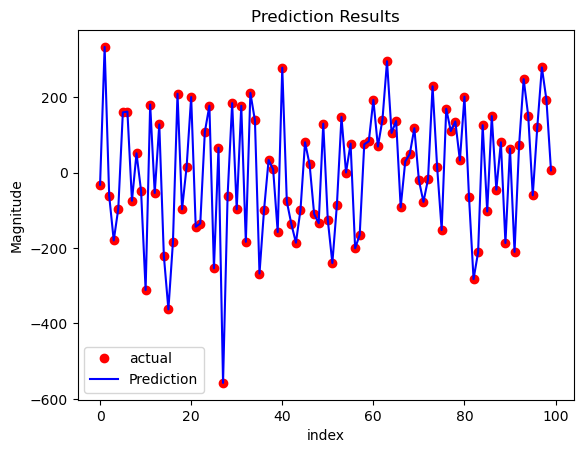

In [22]:
plot_prediction()

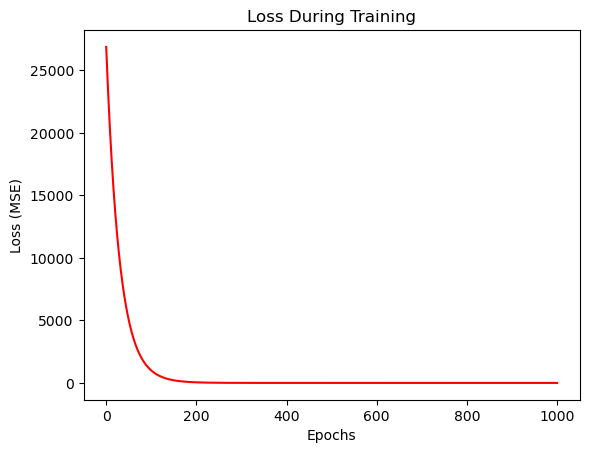

In [23]:
plot_loss()

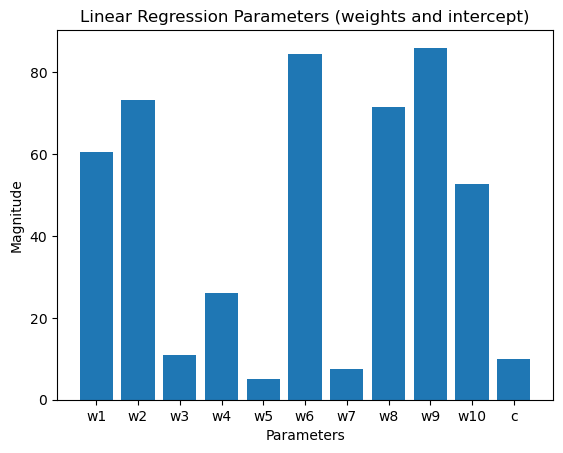

In [24]:
plot_params()

In [25]:
weights

tensor([[59.4697],
        [72.5024],
        [10.3001],
        [25.8268],
        [ 5.7436],
        [83.8590],
        [ 6.8698],
        [71.0799],
        [85.8332],
        [52.1976]], requires_grad=True)

In [26]:
intercept

tensor(9.6825, requires_grad=True)

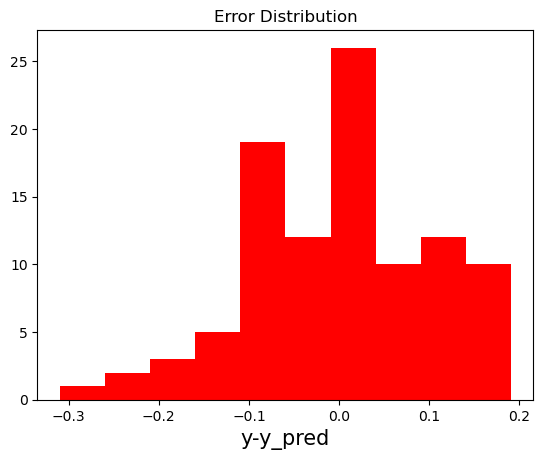

In [27]:
plot_dist_error()

### Change Calculation using Torch

In [28]:
import torch.nn as nn

ns, nf = X.shape
model = nn.Linear(nf, 1)
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
loss = nn.MSELoss()

In [29]:
a, b = model.parameters()

In [30]:
a

Parameter containing:
tensor([[ 0.0129, -0.2668, -0.2569, -0.2115,  0.1509,  0.0878, -0.0187,  0.0394,
          0.2436,  0.2613]], requires_grad=True)

In [31]:
b

Parameter containing:
tensor([-0.1217], requires_grad=True)

In [32]:
max_iters = 300
lr = 0.01
#record initial Loss
loss_records = []
#printing training results
print_speed = max_iters/10

# run linear regression:
run = True
epoch = 0
while run:
    # Do forward calculation
    y_pred = model(X)

    # Record Loss and print results
    loss_ = loss(y, y_pred)
    loss_records.append(loss_)
    if epoch == 0:
        print(f"Before Training. Loss: {loss_records[epoch] :.4f}")
    elif epoch % print_speed == 0:
        print(f"Epoch-{epoch}. Loss: {loss_records[epoch] :.4f}")

    # Zero Gradients
    optimizer.zero_grad()
    
    # Compute Gradient
    loss_.backward()

    # Update params
    optimizer.step()

    
    # update epoch
    epoch += 1

    # Stoping loop
    if epoch > max_iters:
        run = False

print(f"Final Results. Loss: {loss_records[-1] :.4f}")

Before Training. Loss: 26844.8906
Epoch-30. Loss: 9757.1523
Epoch-60. Loss: 3616.8359
Epoch-90. Loss: 1369.6266
Epoch-120. Loss: 530.4730
Epoch-150. Loss: 210.2618
Epoch-180. Loss: 85.2799
Epoch-210. Loss: 35.3688
Epoch-240. Loss: 14.9833
Epoch-270. Loss: 6.4757
Epoch-300. Loss: 2.8527
Final Results. Loss: 2.8527


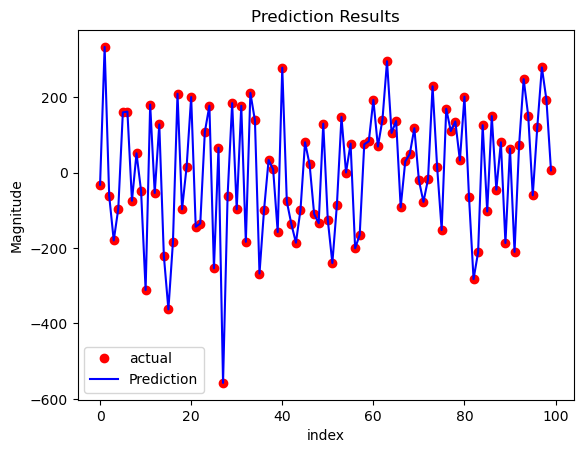

In [33]:
plot_prediction()

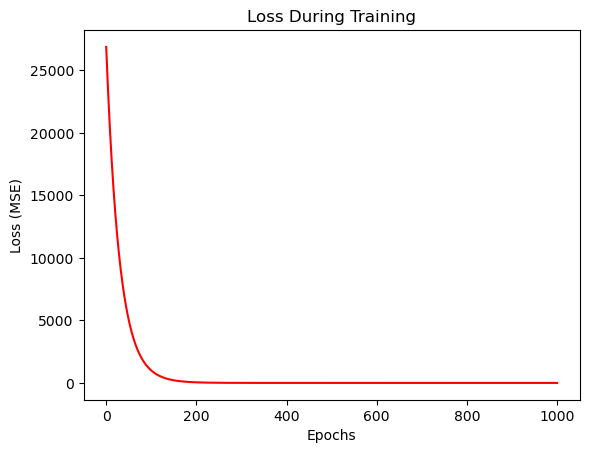

In [34]:
plot_loss()

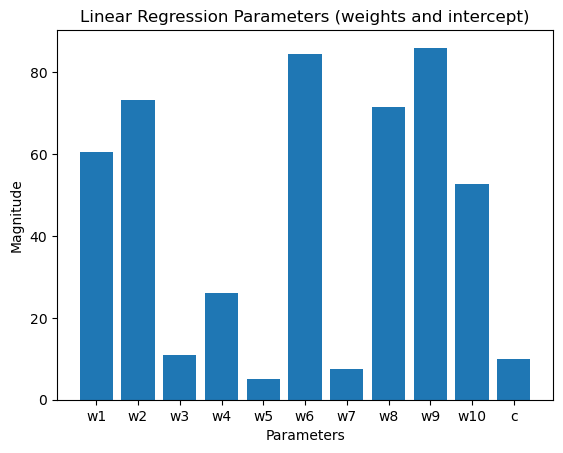

In [35]:
plot_params()

In [36]:
weights

tensor([[59.4697],
        [72.5024],
        [10.3001],
        [25.8268],
        [ 5.7436],
        [83.8590],
        [ 6.8698],
        [71.0799],
        [85.8332],
        [52.1976]], requires_grad=True)

In [37]:
intercept

tensor(9.6825, requires_grad=True)

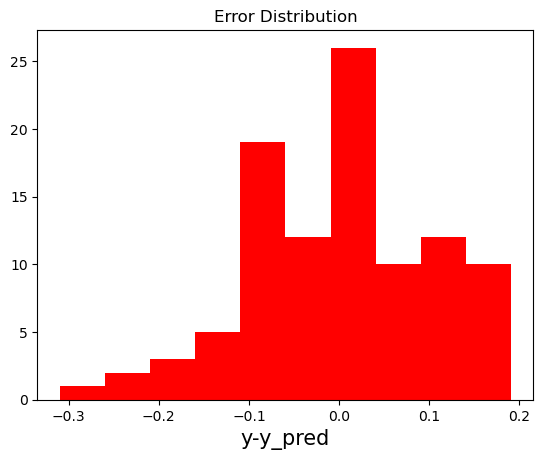

In [38]:
plot_dist_error()

### Create Full Set OOP Linear Regression Using Torch

In [39]:
# create linear Regression

class TorchLinear(nn.Module):

    # initialize everythings
    def __init__(self, n_features_in):
        super().__init__()
        self.linear = nn.Linear(n_features_in, 1)

    # create forward function
    def forward(self, X):
        return self.linear(X)   

In [40]:
# linear model
model = TorchLinear(nf)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [41]:
max_iters = 300
lr = 0.01
#record initial Loss
loss_records = []
#printing training results
print_speed = max_iters/10

# run linear regression:
run = True
epoch = 0
while run:
    # Do forward calculation
    y_pred = model.forward(X)

    # Record Loss and print results
    loss_ = loss(y, y_pred)
    loss_records.append(loss_)
    if epoch == 0:
        print(f"Before Training. Loss: {loss_records[epoch] :.4f}")
    elif epoch % print_speed == 0:
        print(f"Epoch-{epoch}. Loss: {loss_records[epoch] :.4f}")
    
    # Compute Gradient
    loss_.backward()

    # Update params
    optimizer.step()
    
    # Zero Gradients
    optimizer.zero_grad()
    
    # update epoch
    epoch += 1

    # Stoping loop
    if epoch > max_iters:
        run = False

print(f"Final Results. Loss: {loss_records[-1] :.4f}")

Before Training. Loss: 26906.6445
Epoch-30. Loss: 9776.8086
Epoch-60. Loss: 3622.9087
Epoch-90. Loss: 1371.4280
Epoch-120. Loss: 530.9756
Epoch-150. Loss: 210.3885
Epoch-180. Loss: 85.3064
Epoch-210. Loss: 35.3720
Epoch-240. Loss: 14.9828
Epoch-270. Loss: 6.4754
Epoch-300. Loss: 2.8529
Final Results. Loss: 2.8529


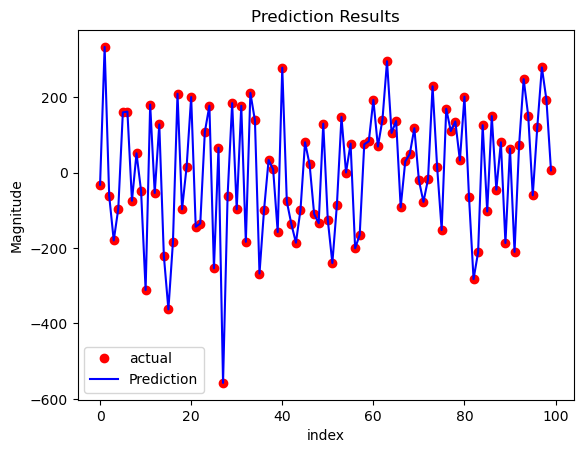

In [42]:
plot_prediction()

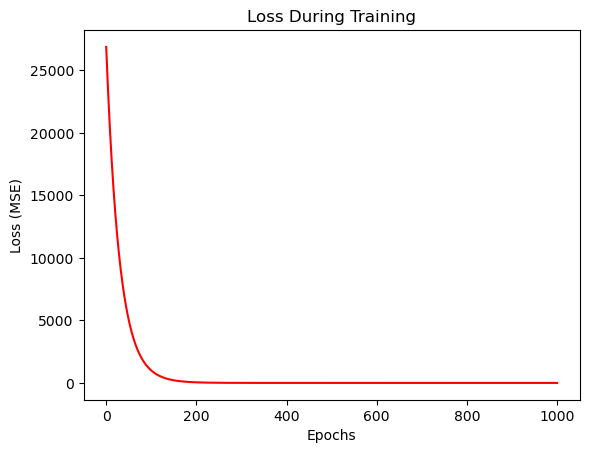

In [43]:
plot_loss()

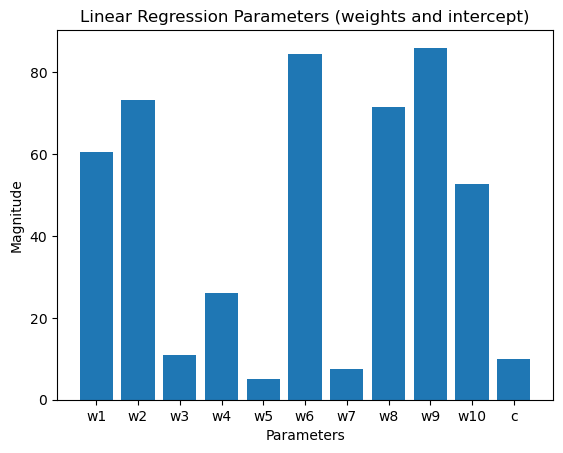

In [44]:
plot_params()

In [45]:
w, c = model.parameters()

In [46]:
w

Parameter containing:
tensor([[59.4667, 72.5031, 10.2976, 25.8188,  5.7483, 83.8551,  6.8675, 71.0826,
         85.8375, 52.1936]], requires_grad=True)

In [47]:
c

Parameter containing:
tensor([9.6862], requires_grad=True)

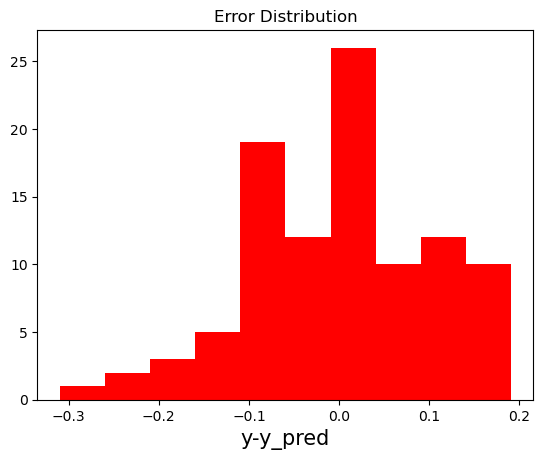

In [48]:
plot_dist_error()

# Classification Task: Logistic Regression

In [49]:
from sklearn.datasets import make_classification

X_train, y_train = make_classification(n_features=10, n_informative = 7, random_state=7)

In [50]:
# check the data shape
X_train.shape, y_train.shape

((100, 10), (100,))

In [51]:
# check the unique counts
np.unique(y_train, return_counts=True)

(array([0, 1]), array([50, 50], dtype=int64))

In [52]:
X = torch.tensor(X_train.astype(np.float32))
y = y_train.reshape(-1,1)
y = torch.tensor(y.astype(np.float32))

In [53]:
class TorchLogit(nn.Module):

    # initialize model
    def __init__(self, n_features_in, lr = lr):
        super().__init__()
        self.linear = nn.Linear(n_features_in, 1)
        self.lr = lr

    # forward calculation
    def forward(self,X):
        y_pred = torch.sigmoid(self.linear(X)) 
        return y_pred

In [54]:
# take the number of features and samples
ns, nf = X.shape

# create model object
logit = TorchLogit(nf, lr)

# loss function
loss = nn.BCELoss()

# optimizer
optimizer = torch.optim.SGD(logit.parameters(), lr)

In [55]:
max_iters = 1000
#record initial Loss
loss_records = []
#printing training results
print_speed = max_iters/10

# run linear regression:
run = True
epoch = 0
while run:
    # Do forward calculation
    y_pred = logit.forward(X)

    # Record Loss and print results
    loss_ = loss(y_pred, y)
    loss_records.append(loss_)
    if epoch == 0:
        print(f"Before Training. Loss: {loss_records[epoch] :.4f}")
    elif epoch % print_speed == 0:
        print(f"Epoch-{epoch}. Loss: {loss_records[epoch] :.4f}")
    
    # Compute Gradient
    loss_.backward()

    # Update params
    optimizer.step()
    
    # Zero Gradients
    optimizer.zero_grad()
    
    # update epoch
    epoch += 1

    # Stoping loop
    if epoch > max_iters:
        run = False

print(f"Final Results. Loss: {loss_records[-1] :.4f}")

Before Training. Loss: 0.7585
Epoch-100. Loss: 0.5589
Epoch-200. Loss: 0.5122
Epoch-300. Loss: 0.4923
Epoch-400. Loss: 0.4822
Epoch-500. Loss: 0.4763
Epoch-600. Loss: 0.4725
Epoch-700. Loss: 0.4697
Epoch-800. Loss: 0.4677
Epoch-900. Loss: 0.4660
Epoch-1000. Loss: 0.4646
Final Results. Loss: 0.4646


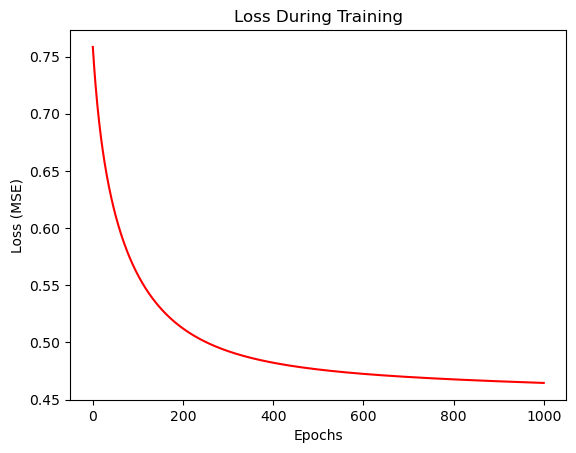

In [56]:
loss_records = [i.item() for i in loss_records]
plot_loss(loss_records)

In [57]:
acc = 100*(y_pred.round() == y).sum()/len(y)

print(f"accuracy = {acc :.2f}%")

accuracy = 80.00%
